# **FLIGHT FARE PREDICTION USING MACHINE LEARNING**

##                                                            **Feature Enginneering**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_excel("/content/Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648




---



---



In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


# **HANDLING OBJECT DATA**

---



---



Creating new columns for the analysis

In [ ]:
df.loc[:, "journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df.loc[:, "journey_month"] = pd.to_datetime(df.Date_of_Journey,format = "%d/%m/%Y").dt.month
df.loc[:, "journey_year"] = pd.to_datetime(df.Date_of_Journey,format = "%d/%m/%Y").dt.year



In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
df.drop(['Date_of_Journey'], axis=1, inplace=True)



In [ ]:
# Similar to Date_of_Journey we can extract values from Dep_Time  by Extracting Hours.

In [ ]:
df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute

df.drop(['Dep_Time'], axis=1, inplace=True)

<ipython-input-66-e6d2e506a4ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
<ipython-input-66-e6d2e506a4ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute
<ipython-input-66-e6d2e506a4ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [ ]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [ ]:
# Similar to Date_of_Journey we can extract values from Arrival_Time.

In [ ]:
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute

df.drop(['Arrival_Time'], axis=1, inplace=True)

In [ ]:
df.head(15)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [ ]:
# Duration is the difference betwen Arrival Time and Departure time
# Assigning and converting Duration column into list

In [ ]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))


df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

df.drop(["Duration"], axis = 1, inplace = True)

df.head()

<ipython-input-72-04f19d2d3260>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Duration_hours"] = duration_hours
<ipython-input-72-04f19d2d3260>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Duration_mins"] = duration_mins
<ipython-input-72-04f19d2d3260>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dr

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


a) Which airline is most preferred airline

<ipython-input-73-46225c7a2cf1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="viridis")


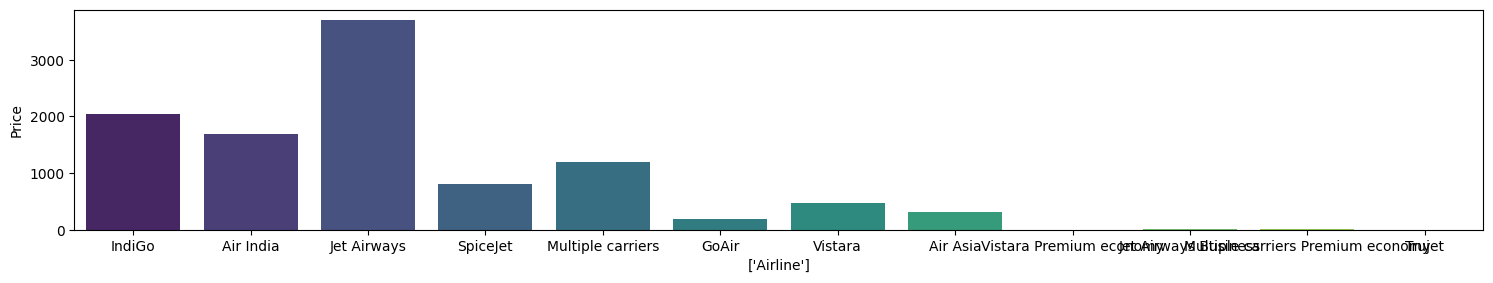

In [ ]:
cat_col=["Airline"]
plt.figure(figsize=(40,20))
for i,col in enumerate(cat_col,1):
  plt.subplot(6,2,i)
  sns.countplot(data=df,x=col,palette="viridis")
  plt.xlabel(cat_col)
  plt.ylabel('Price')
plt.show()

 b.Find the majority of the flights take off from which
source

<ipython-input-74-d3bace47d462>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Source',y='Price',data=df,ax=axes,palette="rocket")


<Axes: xlabel='Source', ylabel='Price'>

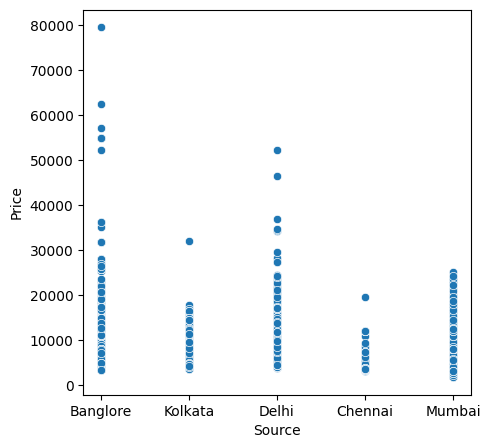

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(5,5))

sns.scatterplot(x='Source',y='Price',data=df,ax=axes,palette="rocket")


c) Find maximum flights land in which destination


<ipython-input-75-0ee653d3c56b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="viridis")


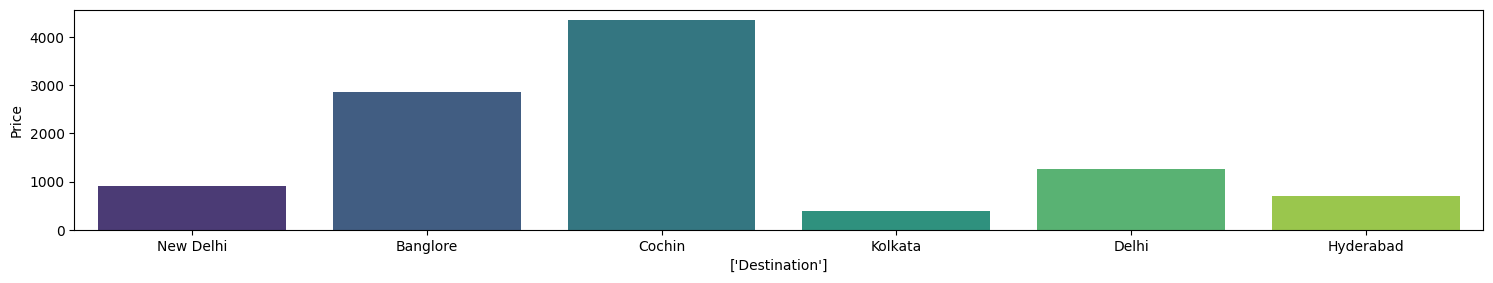

In [ ]:
cat_col=["Destination"]
plt.figure(figsize=(40,20))
for i,col in enumerate(cat_col,1):
  plt.subplot(6,2,i)
  sns.countplot(data=df,x=col,palette="viridis")
  plt.xlabel(cat_col)
  plt.ylabel('Price')
plt.show()

# **HANDLING CATEGORICAL DATA**

---



---



In [ ]:
df.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
df.Destination.value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
df.Source.value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
for i in df.columns:
  df[i]=label.fit_transform(df[i])
df

<ipython-input-79-0985a38e78a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=label.fit_transform(df[i])
<ipython-input-79-0985a38e78a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=label.fit_transform(df[i])
<ipython-input-79-0985a38e78a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,18,4,8,65,8,0,0,22,4,1,2,2,10
1,1,3,0,84,1,8,669,0,2,0,5,10,13,3,7,5
2,4,2,1,118,1,8,1537,3,3,0,9,5,4,5,19,0
3,3,3,0,91,0,8,389,4,2,0,18,1,23,6,5,5
4,3,0,5,29,0,8,1457,0,0,0,16,10,21,7,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,8,81,3,1,0,19,11,22,5,2,6
10679,1,3,0,64,4,8,84,9,1,0,20,9,23,4,2,7
10680,4,0,2,18,4,8,604,9,1,0,8,4,11,4,3,0
10681,10,0,5,18,4,8,1377,0,0,0,11,6,14,2,2,8


In [ ]:
df.Total_Stops.value_counts()

0    5625
4    3475
1    1318
2      43
3       1
Name: Total_Stops, dtype: int64

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,18,4,8,65,8,0,0,22,4,1,2,2,10
1,1,3,0,84,1,8,669,0,2,0,5,10,13,3,7,5
2,4,2,1,118,1,8,1537,3,3,0,9,5,4,5,19,0
3,3,3,0,91,0,8,389,4,2,0,18,1,23,6,5,5
4,3,0,5,29,0,8,1457,0,0,0,16,10,21,7,4,9


**FEATURE SELECTION**

In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'journey_year', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [ ]:
x=df.drop(["Price"],axis=1)
y=df["Price"]

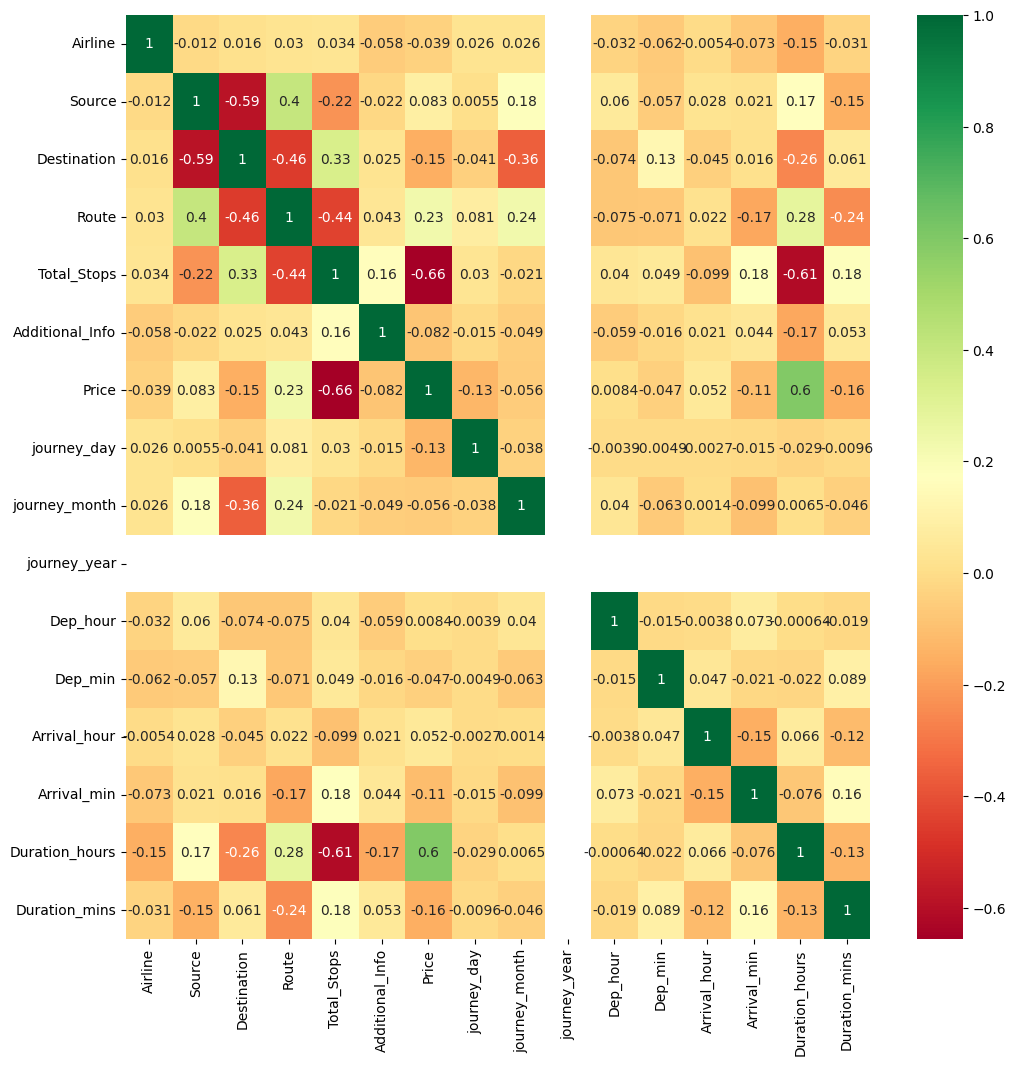

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

# **LINEAR REGRESSION**

---



In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(x_train,y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
y_pred=model.predict(x_test)
y_pred

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(mse)
print(mae)
print(r2)



153671.82205218825
312.76864102173715
0.5241626780071347


**HYPERPARAMETER TUNING**

In [ ]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict

lasso_model=Lasso()
ridge_model=Ridge()
alpha_values=[0.001,0.01,0.1]
lasso_gsh=GridSearchCV(lasso_model,{'alpha':alpha_values},cv=5)
ridge_gsh=GridSearchCV(ridge_model,{'alpha':alpha_values},cv=5)
lasso_gsh.fit(x_train,y_train)
ridge_gsh.fit(x_train,y_train)

best_l_params=lasso_gsh.best_params_
best_l_score=lasso_gsh.best_score_
best_r_params=ridge_gsh.best_params_
best_r_score=ridge_gsh.best_score_

print("best_l_paramaters:",best_l_params)
print("best_l_score:",best_l_score)
print("best_r_paramaters:",best_r_params)
print("best_r_score:",best_r_score)
reg=LinearRegression()
k_fold=KFold(n_splits=10,shuffle=True,random_state=2)
cv_score=cross_val_score(reg,x,y,cv=k_fold)
cv_predictions=cross_val_predict(reg,x,y,cv=k_fold)

r2_scr=r2_score(y,cv_predictions)
print("R-squared",r2_scr)

best_l_paramaters: {'alpha': 0.1}
best_l_score: 0.5144494865446019
best_r_paramaters: {'alpha': 0.1}
best_r_score: 0.5144494500653262
R-squared 0.517303793486276


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

reg=DecisionTreeRegressor(random_state=100)
reg.fit(x_train,y_train)
y_pred_dt=reg.predict(x_test)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


mse=mean_squared_error(y_test,y_pred_dt)
mae=mean_absolute_error(y_test,y_pred_dt)
r2=r2_score(y_test,y_pred_dt)
print(mse)
print(mae)
print(r2)



37272.651085629346
88.4113712374582
0.8845870489507365


# **RANDOM FOREST**

---



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

y_pred_rf=rf.predict(x_test)
y_pred_rf

mse=mean_squared_error(y_test,y_pred_rf)
mae=mean_absolute_error(y_test,y_pred_rf)
r2=r2_score(y_test,y_pred_rf)
print(mse)
print(mae)
print(r2)

23322.605071639122
79.75783043629939
0.9277826878670243


In [ ]:
from sklearn import metrics
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid={
    'n_estimators':[10,20,30],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

random_search=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5)
random_search.fit(x_train,y_train)

best_params=random_search.best_params_
print("best paramaters:",best_params)

y_pred_rf=random_search.predict(x_test)
mse=mean_squared_error(y_test,y_pred_rf)
mae=mean_absolute_error(y_test,y_pred_rf)
r2=r2_score(y_test,y_pred_rf)
print(mse)
print(mae)
print(r2)

best paramaters: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
23203.042582405502
82.56632357871659
0.9281529072991099


# **Boosting**

---



In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np

In [ ]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)


y_pred_xg=xgb.predict(x_test)
y_pred_xg


array([1652.9451  ,   77.591125,  172.789   , ..., 1152.8866  ,
       1053.5527  , 1394.801   ], dtype=float32)

In [ ]:
mse=mean_squared_error(y_test,y_pred_xg)
mae=mean_absolute_error(y_test,y_pred_xg)
r2=r2_score(y_test,y_pred_xg)
print(mse)
print(mae)
print(r2)

133739.28714116503
250.4985834510202
0.5858828027894746


In [ ]:
!pip install lightgbm

In [ ]:

from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(x_train,y_train)

#prediction
y_pred_lgbm=lgbm.predict(x_test)
y_pred_lgbm

#score
mse=mean_squared_error(y_test,y_pred_lgbm)
mae=mean_absolute_error(y_test,y_pred_lgbm)
r2=r2_score(y_test,y_pred_lgbm)
print(mse)
print(mae)
print(r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 8369, number of used features: 14
[LightGBM] [Info] Start training from score 805.118652
23395.46880398138
102.34191484375368
0.9275570688641054


In [ ]:
!pip install catboost


In [ ]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.1,
                                   depth=6,
                                   verbose=100)

catboost_model.fit(x_train, y_train)

y_pred_cb = catboost_model.predict(x_test)
y_pred_cb

mse=mean_squared_error(y_test,y_pred_cb)
mae=mean_absolute_error(y_test,y_pred_cb)
r2=r2_score(y_test,y_pred_cb)
print(mse)
print(mae)
print(r2)

0:	learn: 531.4624855	total: 14ms	remaining: 14s
100:	learn: 185.9720309	total: 815ms	remaining: 7.25s
200:	learn: 156.3158995	total: 1.38s	remaining: 5.5s
300:	learn: 137.7529720	total: 1.79s	remaining: 4.16s
400:	learn: 125.9933871	total: 2.22s	remaining: 3.31s
500:	learn: 117.9033904	total: 2.44s	remaining: 2.43s
600:	learn: 111.8403309	total: 2.62s	remaining: 1.74s
700:	learn: 106.9771341	total: 2.79s	remaining: 1.19s
800:	learn: 102.8617881	total: 2.97s	remaining: 737ms
900:	learn: 99.1466940	total: 3.18s	remaining: 350ms
999:	learn: 95.8989912	total: 3.56s	remaining: 0us
18406.046229147294
86.00347687756938
0.9430065731687626


In [ ]:
scores=['MSE','MAE','R2 SCORE']
name=['linear regression','decision tree','random forest','xg_boost','Light_boost','cat_boost']
pred=[y_pred,y_pred_dt,y_pred_rf,y_pred_xg,y_pred_lgbm,y_pred_cb]
mse=[]
mae=[]
r2=[]
adj_R2=[]
for j in pred:
  mse.append(mean_squared_error(y_test,j))
  mae.append(mean_absolute_error(y_test,j))
  r2.append(r2_score(y_test,j))
eval_scores=pd.DataFrame(
    {'Models':name,
     'MSE':mse,
     'MAE':mae,
     'R2':r2}
)
print(eval_scores)

              Models            MSE         MAE        R2
0  linear regression  153671.822052  312.768641  0.524163
1      decision tree   37272.651086   88.411371  0.884587
2      random forest   23203.042582   82.566324  0.928153
3           xg_boost  133739.287141  250.498583  0.585883
4        Light_boost   23395.468804  102.341915  0.927557
5          cat_boost   18406.046229   86.003477  0.943007


**The CatBoost Model  with 0.94% has the highest R2 score value for Prediction.**